<a href="https://colab.research.google.com/github/kerdokurs/ids_project/blob/master/IDS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS Project

2021 on andmed ainult kuni 30 aprillini

2019 avati rattaringlus 8 juunil


In [1]:
# Check for source in the README file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from itertools import cycle, islice

In [2]:
# Import the weather data
# Check for source in the README file
#   - Use English translations for the columns
#   - Parse date as datetime
#   - Ignore the first row now that we have our own column names
#   - Parse all other columns automatically

weather_data = pd.read_csv(
  "data/weather_2019_2021.csv",
  names=["time", "temperature", "humidity", "pressure", "wind_speed", "wind_direction", "precipitation"],
  na_values=" ",
  parse_dates=["time"],
  skiprows=1,
)

In [3]:
# Clean the weather dataset

weather_data = weather_data.drop(columns=["pressure", "wind_direction"])

In [4]:
print(f"Dataset size: {weather_data.shape}")
print(weather_data.dtypes)
weather_data.head()

Dataset size: (247969, 5)
time             datetime64[ns]
temperature             float64
humidity                float64
wind_speed              float64
precipitation           float64
dtype: object


,time,temperature,humidity,wind_speed,precipitation
0,2019-01-01 00:00:00,-1.237364,88.136591,6.090115,0.0
1,2019-01-01 00:05:00,-1.218086,87.843514,6.113306,0.0
2,2019-01-01 00:10:00,-1.212630,87.741134,6.483215,0.0
3,2019-01-01 00:15:00,-1.193596,87.252225,7.569293,0.0
4,2019-01-01 00:20:00,-1.171625,87.013905,7.577561,0.0


In [5]:
# Import bike data
bike_data_2019 = pd.read_csv("data/rattaringlus/2019.csv")
bike_data_2020 = pd.read_csv("data/rattaringlus/2020.csv")
bike_data_2021 = pd.read_csv("data/rattaringlus/2021.csv")

In [6]:
# Clean bike data by only including data in daterange may 1st to oct 31st
#bike_data_2019 = bike_data_2019[(bike_data_2019["unlockedat"] >= "2019-05-01") & (bike_data_2019["unlockedat"] <= "2019-10-31")]
#bike_data_2020 = bike_data_2020[(bike_data_2020["unlockedat"] >= "2020-05-01") & (bike_data_2020["unlockedat"] <= "2020-10-31")]
#bike_data_2021 = bike_data_2021[(bike_data_2021["unlockedat"] >= "2021-05-01") & (bike_data_2021["unlockedat"] <= "2021-10-31")]

bike_data_2019 = bike_data_2019.append(bike_data_2020)
bike_data = bike_data_2019.append(bike_data_2021)

bike_data = bike_data.sort_values(by="unlockedat")

In [7]:
# Import covid data
covid_data_raw = pd.read_csv("data/covid.csv")

In [8]:
# Clean covid data
covid_data_raw = covid_data_raw.sort_values(by="StatisticsDate")
#covid_data_2020 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2020-05-01") & (covid_data_raw["StatisticsDate"] <= "2020-10-31")]
#covid_data_2021 = covid_data_raw[(covid_data_raw["StatisticsDate"] >= "2021-05-01") & (covid_data_raw["StatisticsDate"] <= "2021-10-31")]
covid_dat = covid_data_raw[((covid_data_raw["StatisticsDate"] < "2021-05-01"))]
covid_dat
covid_data = covid_dat.copy()

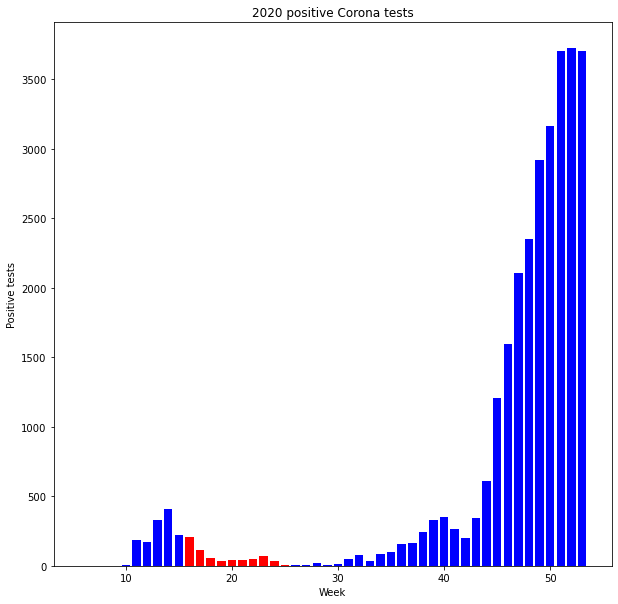

In [153]:
#VISUALISE DATA BY WEEK NUMBER 
plt.rcParams["figure.figsize"] = (10,10)
covid_data["StatisticsDate"] = covid_data["StatisticsDate"].astype(np.datetime64)
covid_data['week_number_of_year']=covid_data["StatisticsDate"].dt.isocalendar().week
covid_data["year"] = covid_data["StatisticsDate"].dt.isocalendar().year
"-------*******-------"
alltst= covid_data.groupby(["week_number_of_year","year"])["ResultValue"].count().rename('count').to_frame().reset_index()
#nakatumiste_data = covid_data.groupby(["week_number_of_year", "year"])["ResultValue"].value_counts().rename('count').to_frame().reset_index()
onlypos = covid_data[covid_data.ResultValue == "P"]
onlypos = onlypos.groupby(["week_number_of_year","year"])["ResultValue"].count().rename('countpos').to_frame().reset_index()
onlypos
alltst["merg"]= alltst["year"].astype(str) + "-" + alltst["week_number_of_year"].astype(str)
onlypos["merg"] = onlypos["year"].astype(str) + "-" +onlypos["week_number_of_year"].astype(str)
what = pd.merge(alltst, onlypos, how="outer")
what.fillna(0, inplace=True)
#what['Result'] = what['countpos']/what['count']
what2020 = what[what.year == 2020]
what2021 = what[what.year == 2021]
#2020 covid positive results by week
weeks = list(range(1, 54))
colors = ["red" if i in range(11,21) else "blue" for i in weeks]
plt.bar(what2020["week_number_of_year"],what2020["countpos"],color=colors)
plt.xlabel("Week")
plt.ylabel("Positive tests")
plt.title("2020 positive Corona tests")
#iga nädala positiivsete osakaal
plt.savefig('2020poscoronaallyear.png')

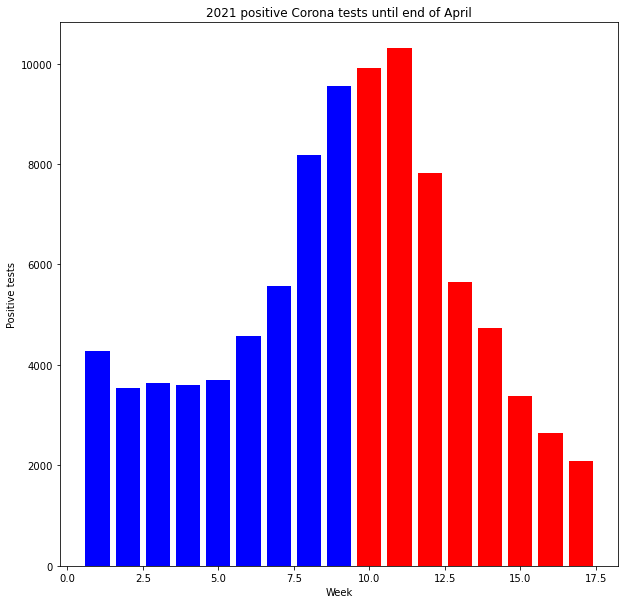

In [154]:
#2021 covid positive results average by week
weeks = list(range(1, 18))
colors = ["red" if i in range(10,18) else "blue" for i in weeks]
plt.bar(what2021["week_number_of_year"],what2021["countpos"],color=colors)
plt.xlabel("Week")
plt.ylabel("Positive tests")
plt.title("2021 positive Corona tests until end of April")
plt.savefig('2021poscoronatilapril.png')

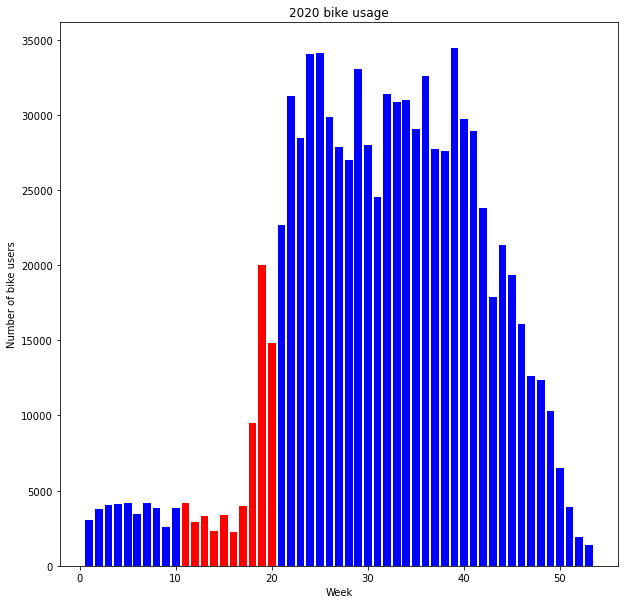

In [317]:
#same thing with bike data
bike_data_all_weeks = bike_data.copy()
bike_data_all_weeks["unlockedat"] = bike_data_all_weeks["unlockedat"].astype(np.datetime64)
bike_data_all_weeks["week"] = bike_data_all_weeks["unlockedat"].dt.isocalendar().week
bike_data_all_weeks["year"] = bike_data_all_weeks["unlockedat"].dt.isocalendar().year

"--------*******--------"
# no of bike rides in 2020 and 2021
allb = bike_data_all_weeks.groupby(["week","year"]).size().rename('count').to_frame().reset_index()
allb20 = allb[allb.year == 2020]
allb21 = allb[allb.year == 2021]
weeks = list(range(1, 54))
colors = ["red" if i in range(11,21) else "blue" for i in weeks]
plt.bar(allb20["week"],allb20["count"],color=colors)
#punane on eriolukord
plt.xlabel("Week")
plt.ylabel("Number of bike users")
plt.title("2020 bike usage")
plt.savefig('2020bikusageallyear.png')

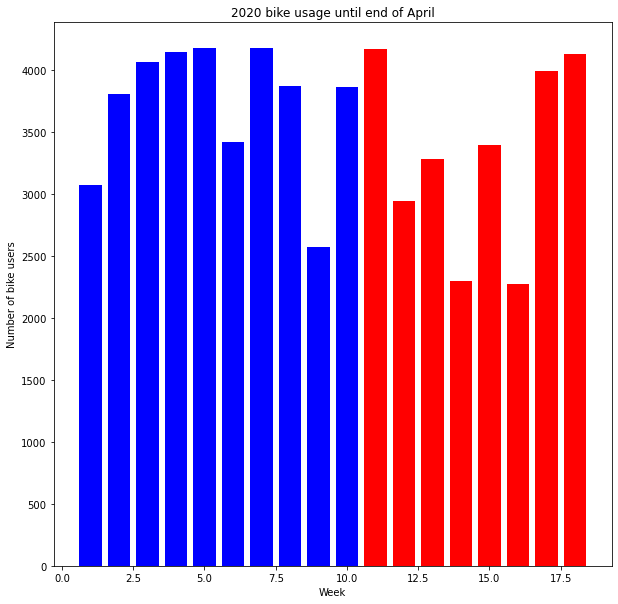

In [318]:
#et vorrelda 2021ga
allb20apr = bike_data_all_weeks[bike_data_all_weeks["unlockedat"] < "2020-05-01"].copy()
allb20apr["unlockedat"] = allb20apr["unlockedat"].astype(np.datetime64)
allb20apr["week"] = allb20apr["unlockedat"].dt.isocalendar().week
allb20apr["year"] = allb20apr["unlockedat"].dt.isocalendar().year

"--------*******--------"

allb = allb20apr.groupby(["week","year"]).size().rename('count').to_frame().reset_index()
allb20apr = allb[allb.year == 2020]
weeks = list(range(1, 19))
colors = ["red" if i in range(11,19) else "blue" for i in weeks]
plt.bar(allb20apr["week"],allb20apr["count"],color=colors)
plt.xlabel("Week")
plt.ylabel("Number of bike users")
plt.title("2020 bike usage until end of April")
#punane on eriolukord
plt.savefig('2020bikeusagetilapril.png')

In [334]:
#siin 2020ronajan-mai
abcron = bike_data.copy()
#mdea mai viitsi
allb20apr1 =  abcron[abcron["unlockedat"] < "2020-05-01"]
allb20apr1 =  abcron[abcron["unlockedat"] >= "2020-01-01"]
allb20apr1["unlockedat"] = allb20apr1["unlockedat"].astype(np.datetime64)
allb20apr1["week"] = allb20apr1["unlockedat"].dt.isocalendar().week
allb20apr1["year"] = allb20apr1["unlockedat"].dt.isocalendar().year
allb20apr1g = allb20apr1.groupby(["week","year"])["ResultValue"].count().rename('count').to_frame().reset_index()

C:\Users\annilo\AppData\Local\Temp/ipykernel_23372/454129012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allb20apr1["unlockedat"] = allb20apr1["unlockedat"].astype(np.datetime64).copy()
C:\Users\annilo\AppData\Local\Temp/ipykernel_23372/454129012.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  allb20apr1["week"] = allb20apr1["unlockedat"].dt.isocalendar().week
C:\Users\annilo\AppData\Local\Temp/ipykernel_23372/454129012.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

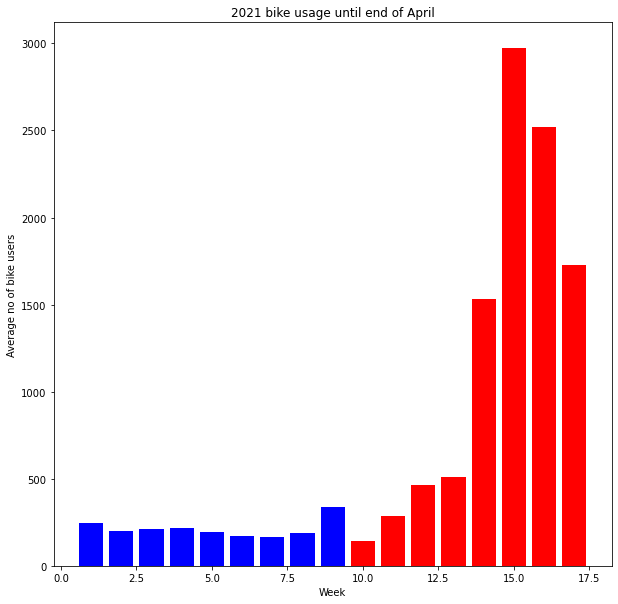

In [158]:
#ka 2021ga vordluseks
weeks = list(range(1, 18))
colors = ["red" if i in range(10,18) else "blue" for i in weeks]
plt.bar(allb21["week"],allb21["count"]/7,color=colors)
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.xlabel("Week")
plt.ylabel("Average no of bike users")
plt.title("2021 bike usage until end of April")
#punane on karmimad piirangud
plt.savefig('2021bikeusagetilapril.png')

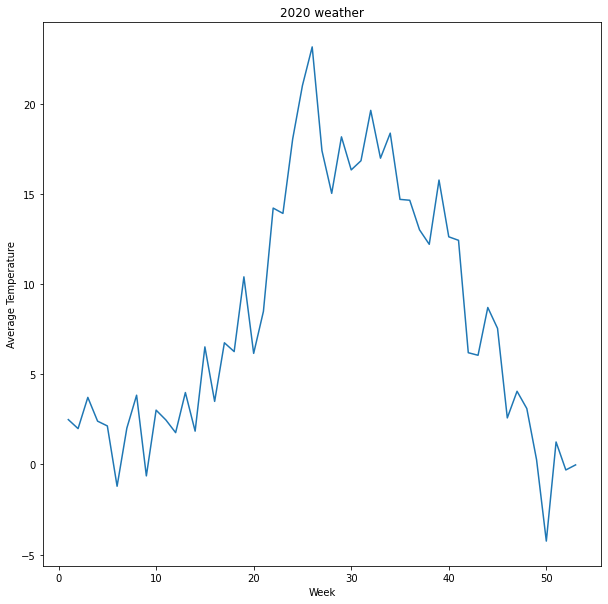

In [159]:
#same with weather
wwd = weather_data
wwd["time"] = weather_data["time"].astype(np.datetime64)
wwd["week"] = wwd["time"].dt.isocalendar().week
wwd["year"]=  wwd["time"].dt.isocalendar().year
wwd20 = wwd[wwd["year"] == 2020].groupby(["week"])["temperature"].mean().rename('mean').to_frame().reset_index()
wwd21 = wwd[wwd["year"] == 2021].groupby(["week"])["temperature"].mean().rename('mean').to_frame().reset_index()

plt.plot(wwd20["week"], wwd20["mean"])
plt.xlabel("Week")
plt.ylabel("Average Temperature")
plt.title("2020 weather")
plt.savefig('2020weatheravg.png')

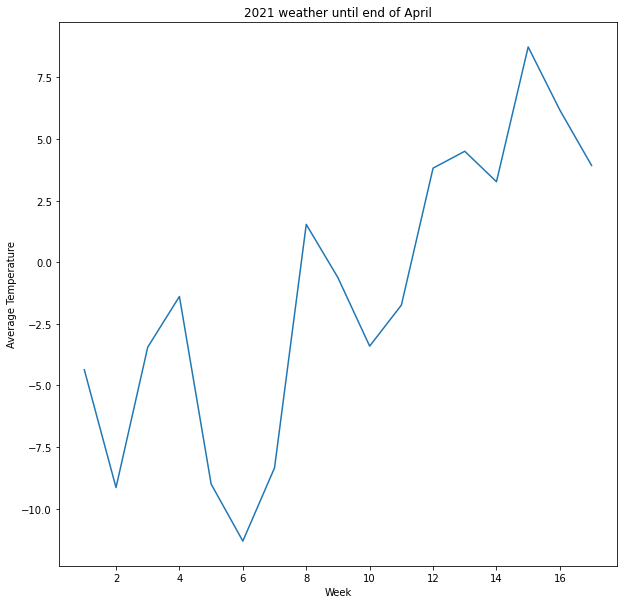

In [160]:
plt.plot(wwd21["week"], wwd21["mean"])
plt.xlabel("X axis label")
plt.ylabel("Y axis label")
plt.xlabel("Week")
plt.ylabel("Average Temperature")
plt.title("2021 weather until end of April")
plt.savefig('2021weatheravg.png')

In [147]:
#okei kuna 2019 data ainult alates juunist
#teen hoopis suvekuude vordluse 19 vs 20
#8 juuni avati rattaringlus
bike_data_weekDays = bike_data.copy()

bike_data_weekDays["unlockedat"] = bike_data_weekDays["unlockedat"].astype(np.datetime64)
bike_data_weekDays["unlockedat_day"] = bike_data_weekDays.unlockedat.dt.date.astype(str)+ bike_data_weekDays["unlockedat"].dt.strftime('%A') 
bike_data20 = bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2020-06-08") & (bike_data_weekDays["unlockedat"] <= "2020-07-30")]
#bike_data21 = bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2021-03-11")]
bike_data1920 =bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2019-06-08") & (bike_data_weekDays["unlockedat"] <= "2019-07-30")]
#bike_data1921 =bike_data_weekDays[(bike_data_weekDays["unlockedat"] >= "2019-03-11") & (bike_data_weekDays["unlockedat"] <= "2019-05-30")]
"----****----"
bike_data20 = bike_data20.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()
#bike_data21 = bike_data21.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()
bike_data1920 = bike_data1920.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()
#bike_data1921 = bike_data1921.groupby(["unlockedat_day"]).size().rename('count').to_frame().reset_index()


#plt.bar(bike_data20["week_no_year"], bike_data20["count"])
#plt.xlabel("X axis label")
#plt.ylabel("Y axis label")


In [166]:
wth = weather_data.copy()
wth["time"] = weather_data["time"].astype(np.datetime64)
wth["unlockedat_day"] = wth.time.dt.date.astype(str)+ wth["time"].dt.strftime('%A') 
wth20 = wth[(wth["time"] >= "2020-06-08") & (wth["time"] <= "2020-07-30")]
wth19 =wth[(wth["time"] >= "2019-06-08") & (wth["time"] <= "2019-07-30")]

<AxesSubplot:title={'center':'2020 Number of bikerides in the summer'}, xlabel='Day', ylabel='Number of bikerides'>

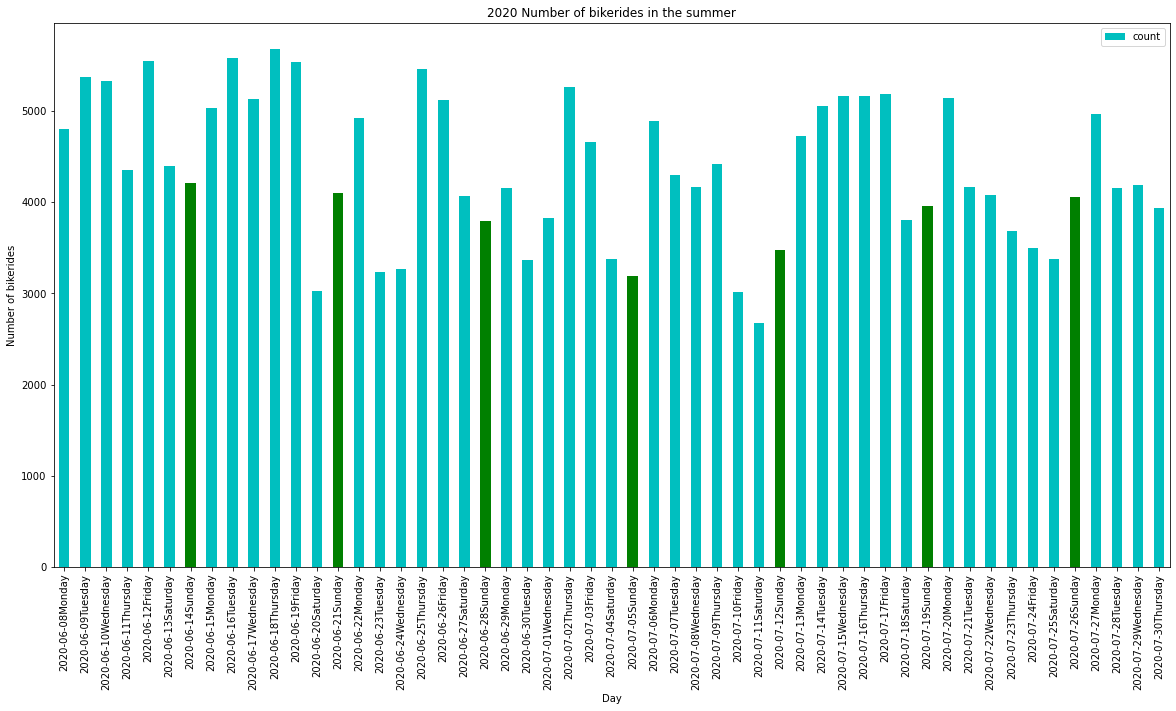

In [167]:
my_colors = list(islice(cycle(['c', 'c', 'c', 'c', 'c','c','g']), None, len(bike_data20)))
bike_data20.plot(x='unlockedat_day',
                 y="count",
        kind='bar',
        stacked=False,
        title='2020 Number of bikerides in the summer',figsize=(20,10),color=my_colors,xlabel="Day",ylabel="Number of bikerides")


<AxesSubplot:title={'center':'2020 Summer weather'}, xlabel='Day', ylabel='Temperature'>

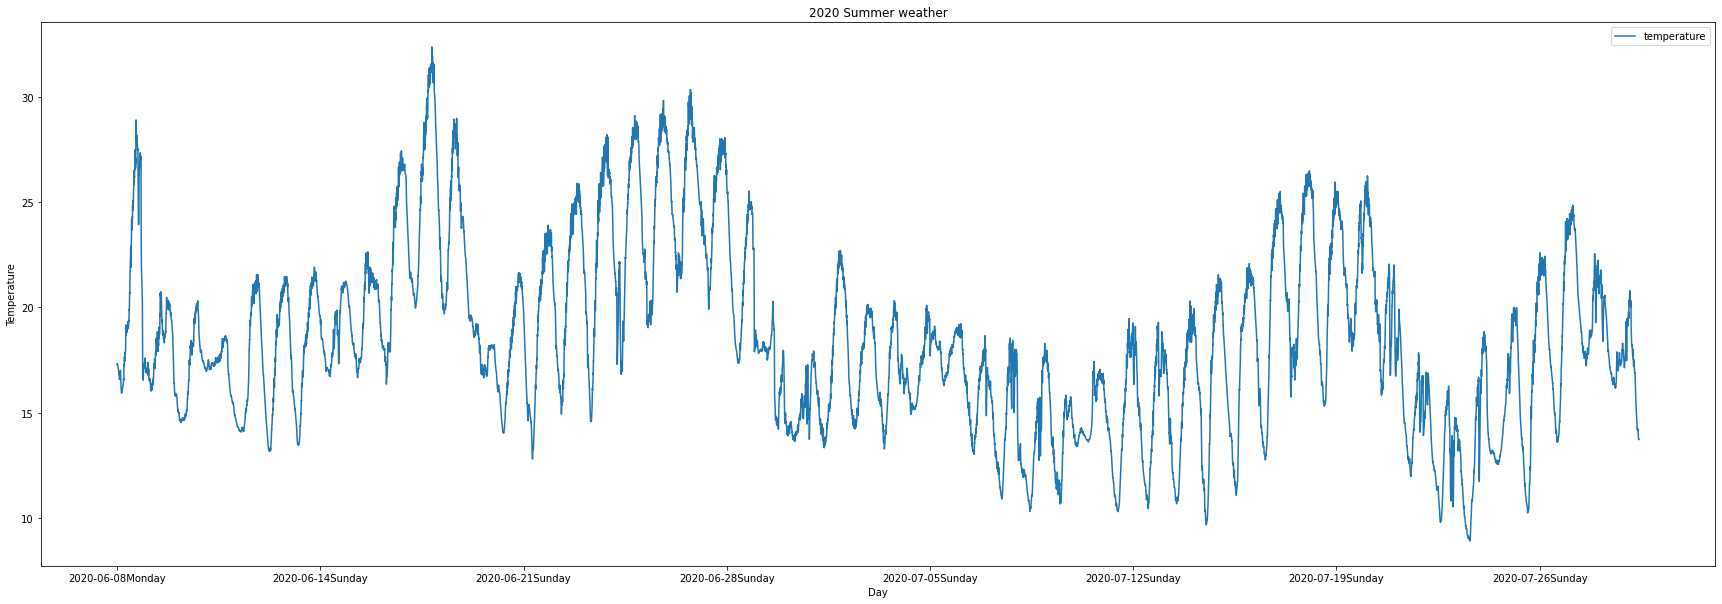

In [186]:
#siia peale v]iks panna ilmaandmed
wth20.plot(x="unlockedat_day",y="temperature",figsize=(30,10),title='2020 Summer weather',xlabel="Day",ylabel="Temperature")

<AxesSubplot:title={'center':'2019 Number of bikerides in the summer'}, xlabel='Day', ylabel='Number of bikerides'>

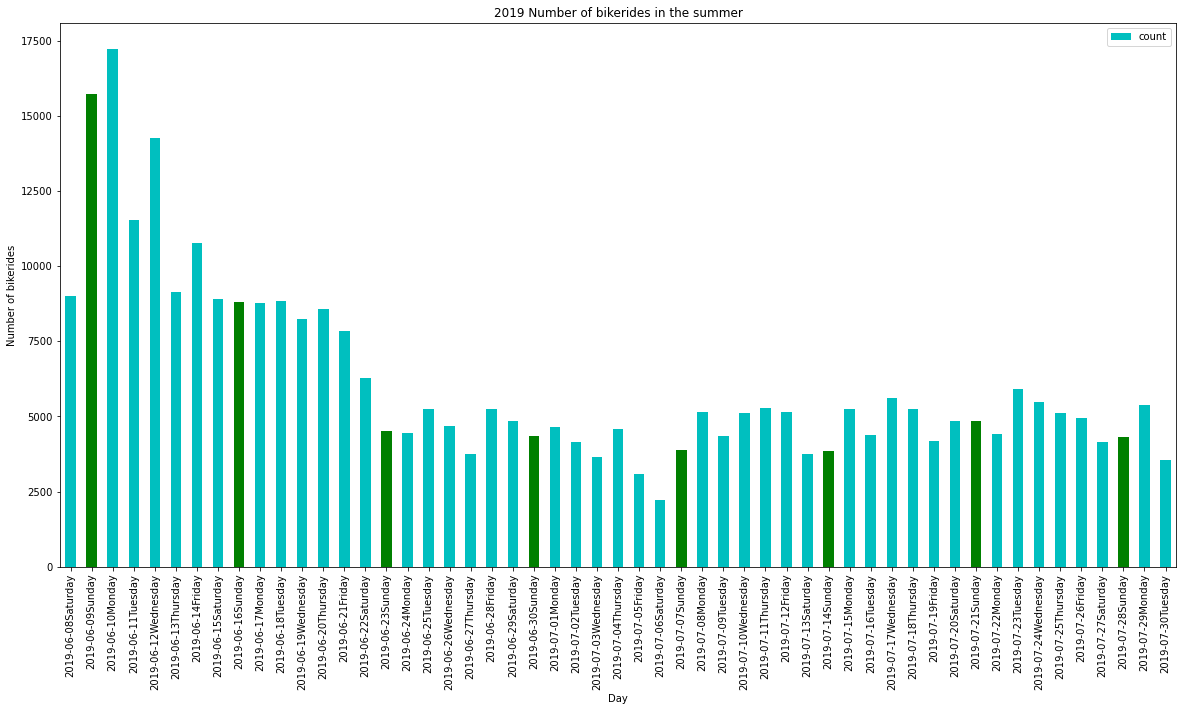

In [171]:
my_colors = list(islice(cycle(['c', 'g', 'c', 'c', 'c','c','c']), None, len(bike_data20)))
bike_data1920.plot(x='unlockedat_day',
                 y="count",
        kind='bar',
        stacked=False,
        title='2019 Number of bikerides in the summer',figsize=(20,10),color=my_colors,xlabel="Day",ylabel="Number of bikerides")
#8 juuni avati rattaringlus
#siia peale ka ilmaandmed

<AxesSubplot:title={'center':'2019 Summer weather'}, xlabel='Day', ylabel='Temperature'>

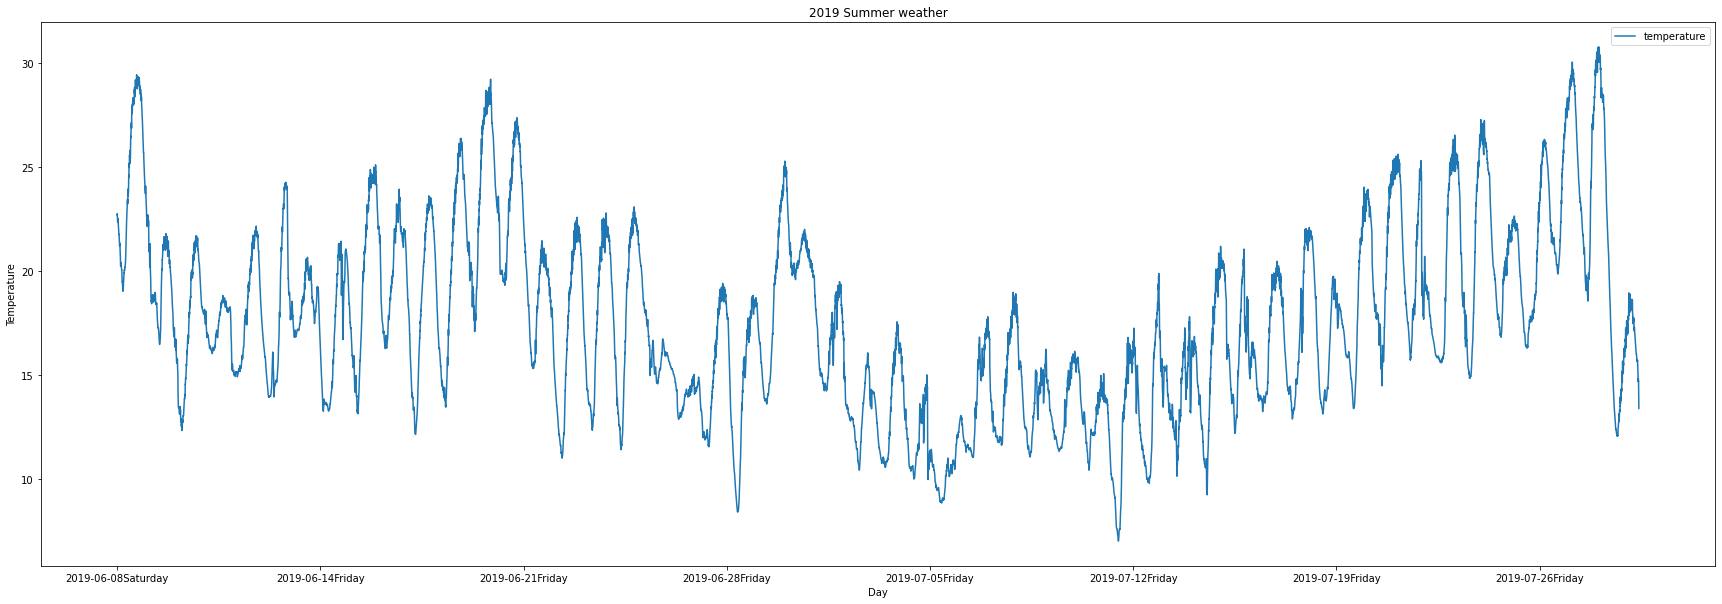

In [181]:
#siia peale v]iks panna ilmaandmed
wth19.plot(x="unlockedat_day",y="temperature",figsize=(30,10),title='2019 Summer weather',xlabel="Day",ylabel="Temperature")

In [268]:
#hypothesis: on average the amount of people who ride bikes during the week is the same as during weekend
#i can assume independence

weekdata = bike_data.copy()
weekdata["unlockedat"] = weekdata["unlockedat"].astype(np.datetime64)
weekdata["week"] = weekdata["unlockedat"].dt.isocalendar().week
weekdata["year"] = weekdata["unlockedat"].dt.isocalendar().year
weekdata["day"] = weekdata["unlockedat"].dt.isocalendar().day #from 1 to 7
inweek = weekdata[weekdata["day"]<6]
weekend = weekdata[weekdata["day"]>5]
#let's find out by week
#find week weekday average
#find week weekend average
inweekg = inweek.groupby(["week","year"]).size().rename('count').to_frame().reset_index()
#how many days are in week (some start at beginning of year etc)
inweekc = inweek.groupby(["week","year"]).agg({"day": "nunique"}).reset_index()#rename('weekdaysinweeknr').to_frame().reset_index()
weekendg = weekend.groupby(["week","year"]).size().rename('count').to_frame().reset_index()
#no  of days in weekend
weekendc = weekend.groupby(["week","year"]).agg({"day": "nunique"}).reset_index()
inweek = pd.merge(inweekc, inweekg, on=("week","year"))
weekend =pd.merge(weekendg, weekendc, on=("week","year"))
inweek["avg"] = inweek["count"]/inweek["day"]
weekend["avg"] = weekend["count"]/weekend["day"]
# Mann-Whitney U test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
# seed the random number generator
seed(1)
# generate two independent samples
# compare samples
stat, p = mannwhitneyu(weekend["avg"], inweek["avg"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
#this means that the avg no of people who ride bikes during week differs from weekend

Statistics=4005.000, p=0.015
Different distribution (reject H0)


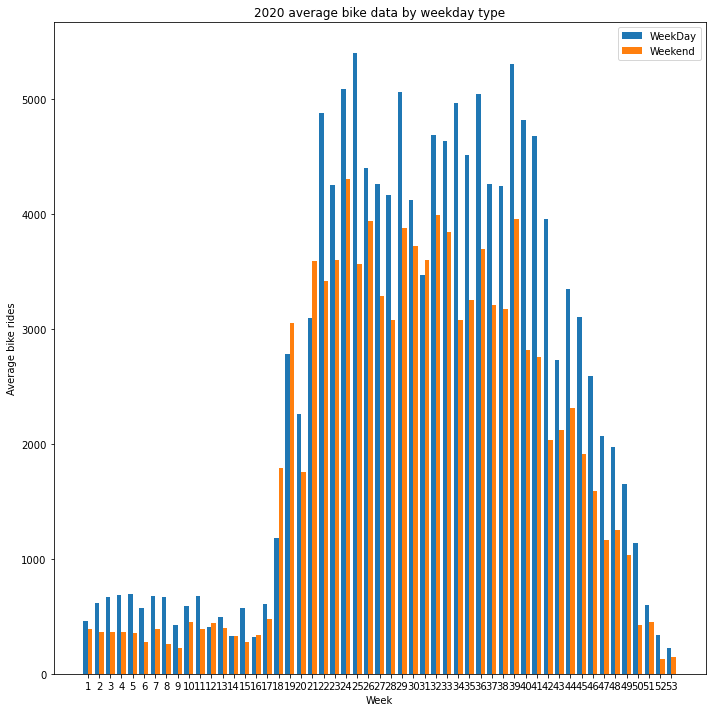

In [310]:
#joonis selle kohta, i mean lowkey naitab mis vaja ig
inweek19 = inweek[inweek["year"] == 2020]
weekend19 = weekend[weekend["year"] == 2020]
#weekend19 = weekend19.drop([weekend19.index[0]])

x = np.arange(1,54)  # the label locations
width = 0.40  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, inweek19["avg"], width, label='WeekDay')
rects2 = ax.bar(x + width/2, weekend19["avg"], width, label='Weekend')
ax.set_ylabel('Average bike rides')
ax.set_xlabel("Week")
ax.set_title('2020 average bike data by weekday type')
ax.set_xticks(np.arange(1, 53+1, 1.0))
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.savefig('2020weekdayvsweekend.png')

In [177]:
# TODO: Is there a difference between the statistics of the bike rides during and before covid
#eg 2019 and 2020/21

# --------------- Average distance pre covid
avg_dist_2019 = bike_data_2019["length"].mean()
avg_dist_2020 = bike_data_2020["length"].mean()
avg_dist_2021 = bike_data_2021["length"].mean()

avg_dist_increase = round((avg_dist_2021 / avg_dist_2019)*100 - 100, 2)

print("Average distance (km) before covid: " + str(avg_dist_2019))
print("Average distance (km) after covid (2020): " + str(avg_dist_2020))
print("Average distance (km) after covid (2021): " + str(avg_dist_2021))

#print("The average distance of bikers has risen " + str(avg_dist_increase) + "% when comparing statistics from 2019 to 2021")


print("The average age of a person using citybikes in 2019 was: " + str(2021 - avg_age_2019))
print("The average age of a person using citybikes in 2020 was: " + str(2021 - avg_age_2020))
print("The average age of a person using citybikes in 2021 was: " + str(2021 - avg_age_2021))


# --------------- "Fun facts" aka longest distance driven, longest duration of unlocked bike
longest_distance = max([max(bike_data_2019["length"]), max(bike_data_2020["length"]), max(bike_data_2021["length"])])
print("Longest distance driven in the years 2019-2021 was " + str(longest_distance) + "km")


#cast unlockedattime and lockedattime columns to datetime
bike_data_2019["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2019["unlockedat"] + " " + bike_data_2019["unlockedattime"], utc=True)
bike_data_2020["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2020["unlockedat"] + " " + bike_data_2020["unlockedattime"], utc=True)
bike_data_2021["unlockedAtTimestamp"] = pd.to_datetime(bike_data_2021["unlockedat"] + " " + bike_data_2021["unlockedattime"], utc=True)

bike_data_2019["lockedAtTimestamp"] = pd.to_datetime(bike_data_2019["lockedat"] + " " + bike_data_2019["lockedattime"], utc=True)
bike_data_2020["lockedAtTimestamp"] = pd.to_datetime(bike_data_2020["lockedat"] + " " + bike_data_2020["lockedattime"], utc=True)
bike_data_2021["lockedAtTimestamp"] = pd.to_datetime(bike_data_2021["lockedat"] + " " + bike_data_2021["lockedattime"], utc=True)

bike_data_2019["rideDuration"] = bike_data_2019["lockedAtTimestamp"] - bike_data_2019["unlockedAtTimestamp"]
bike_data_2020["rideDuration"] = bike_data_2020["lockedAtTimestamp"] - bike_data_2020["unlockedAtTimestamp"]
bike_data_2021["rideDuration"] = bike_data_2021["lockedAtTimestamp"] - bike_data_2021["unlockedAtTimestamp"]

longest_ride = max([max(bike_data_2019["rideDuration"]), max(bike_data_2020["rideDuration"]), max(bike_data_2021["rideDuration"])])
print("NB TODO UURI SEDA!!!Longest ride of the three years was: " + str(longest_ride))




Average distance (km) before covid: 2.6538898793129206
Average distance (km) after covid (2020): 2.665148593127932
Average distance (km) after covid (2021): 2.8012340595737073
The average age of a person using citybikes in 2019 was: 30.988374422187917
The average age of a person using citybikes in 2020 was: 30.85136217436684
The average age of a person using citybikes in 2021 was: 33.085261402827655
Longest distance driven in the years 2019-2021 was 67.48km
Longest ride of the three years was: 15 days 20:37:08


In [180]:
longest=bike_data[bike_data["length"] > 30]
longest
longest
longest[longest["yearOfBirth"] == min(longest["yearOfBirth"])]

,cyclenumber,unlockedat,unlockedattime,lockedat,lockedattime,startstationserialnumber,startstationname,endstationserialnumber,endstationname,length,yearOfBirth,first3IdNumber
154260,2103.0,2019-06-23,06:06:11,2019-06-23,09:11:08,18,Näituse,18,Näituse,37.48,1942.0,342
